In [1]:
import zarrdataset as zds
import tensorflow as tf

In [2]:
# These are images from the Image Data Resource (IDR) 
# https://idr.openmicroscopy.org/ that are publicly available and were 
# converted to the OME-NGFF (Zarr) format by the OME group. More examples
# can be found at Public OME-Zarr data (Nov. 2020)
# https://www.openmicroscopy.org/2020/11/04/zarr-data.html

filenames = [
    "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0073A/9798462.zarr"
]

In [3]:
import random
import numpy as np

# For reproducibility
np.random.seed(478963)
random.seed(478965)

In [4]:
patch_size = dict(Y=1024, X=1024)
patch_sampler = zds.BlueNoisePatchSampler(patch_size=patch_size)

In [5]:
image_specs = zds.ImagesDatasetSpecs(
  filenames=filenames,
  data_group="3",
  source_axes="TCZYX",
)

# A list with a labeled image, for the single image in the dataset, is passed as `filenames` argument.
labels_specs = zds.LabelsDatasetSpecs(
  filenames=[np.ones(1)],
  source_axes="L",
)

my_dataset = zds.ZarrDataset([image_specs, labels_specs],
                             patch_sampler=patch_sampler,
                             shuffle=True)

In [6]:
my_dataloader = tf.data.Dataset.from_generator(
            my_dataset.__iter__,
            output_signature=(tf.TensorSpec(shape=(1, 3, 1, None, None),
                                            dtype=tf.float32),
                              tf.TensorSpec(shape=(1,),
                                            dtype=tf.int64)))

batched_dataset = my_dataloader.batch(4)

In [7]:
samples = []
for i, (sample, target) in enumerate(my_dataloader):
    samples.append(np.moveaxis(sample[0, :, 0], 0, -1))

    print(f"Sample {i+1} with size {sample.shape}, and target {target}")

    if i >= 4:
        # Take only five samples for illustration purposes
        break

samples_stack = np.hstack(samples)

Sample 1 with size (1, 3, 1, 1024, 1024), and target [1]


Sample 2 with size (1, 3, 1, 1024, 1024), and target [1]


Sample 3 with size (1, 3, 1, 1024, 1024), and target [1]


Sample 4 with size (1, 3, 1, 1024, 1024), and target [1]


In [8]:
samples_stack.shape

(1024, 4096, 3)

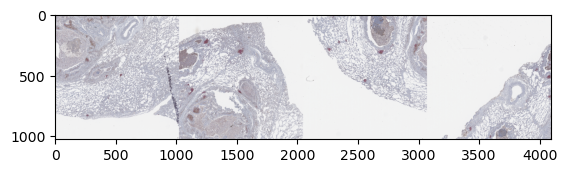

In [9]:
import matplotlib.pyplot as plt

plt.imshow(samples_stack.astype(np.uint8))
plt.show()